# Proyecto: Análisis Exploratorio de los Datos y preparación de un DataSet. 

## Nombre del estudiante:Jose Alejandro Tenorio Chavez
## Número de control:20120161
## Materia/Grupo:Ciencia de datos Grupo : A

El siguiente proyecto tomará como set de datos un conjunto de información sobre los precios de las casas.
El set de datos tiene datos nulos, datos tipo objeto, anomalías, inconsistencias, por lo que es necesario conocimientos previos de EDA para poder prepararlo.
El objetivo es preparar un set de datos para poder usarlo posteriormente en un modelo de ML, no basta con solo volverlo numérico, necesitamos tener conocimientos sobre los datos mismos.
El resultado de esta exploración debe ser:
1. Gráficas y conclusiones acerca de los datos.
2. Eliminación de datos nulos, anomalías e inconsistencias.
3. Generación de un dataframe listo para usarse sobre un modelo de ML (numérico), con las variables, cuya correlación es más fuerte con la variable objetivo, identificadas.


## Análisis y exploración.

### Paso 1: Importar las librerías que se van a utilizar y mostrar las primeras y últimas 5 filas del dataset.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


pd.set_option('display.max_rows', None)
df = pd.read_csv("casas_dataset.csv")

# Mostrar las primeras 5 filas del conjunto de datos
print(df.head())

# Mostrar las últimas 5 filas del conjunto de datos
print(df.tail())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### Paso 2: Mostrar información sobre el dataset, qué tipos son, cuántos nulos hay, datos estadísticos.

In [7]:
# Mostrar información sobre el conjunto de datos
print(df.info())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Paso 3: Mostrar información sobre las variables "objeto" y revisar si se pueden categorizar (todavía no se categorizan, solo se exploran).

In [8]:
# Seleccionar solo las columnas de tipo 'object'
df_obj = df.select_dtypes(include=['object'])

# Para cada columna, mostrar la cantidad de cada valor único
for column in df_obj.columns:
    print("\n" + column)
    print(df_obj[column].value_counts())



MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
mes        225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngt

### Paso 4: Mostrar información sobre las correlaciones (variables numéricas), la variable/columna objetivo es "SalePrice".

In [9]:
# Calcular la correlación de todas las columnas con 'SalePrice'
correlation = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

# Imprimir las correlaciones
print(correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchebvGr      -0.135907
Name: SalePr

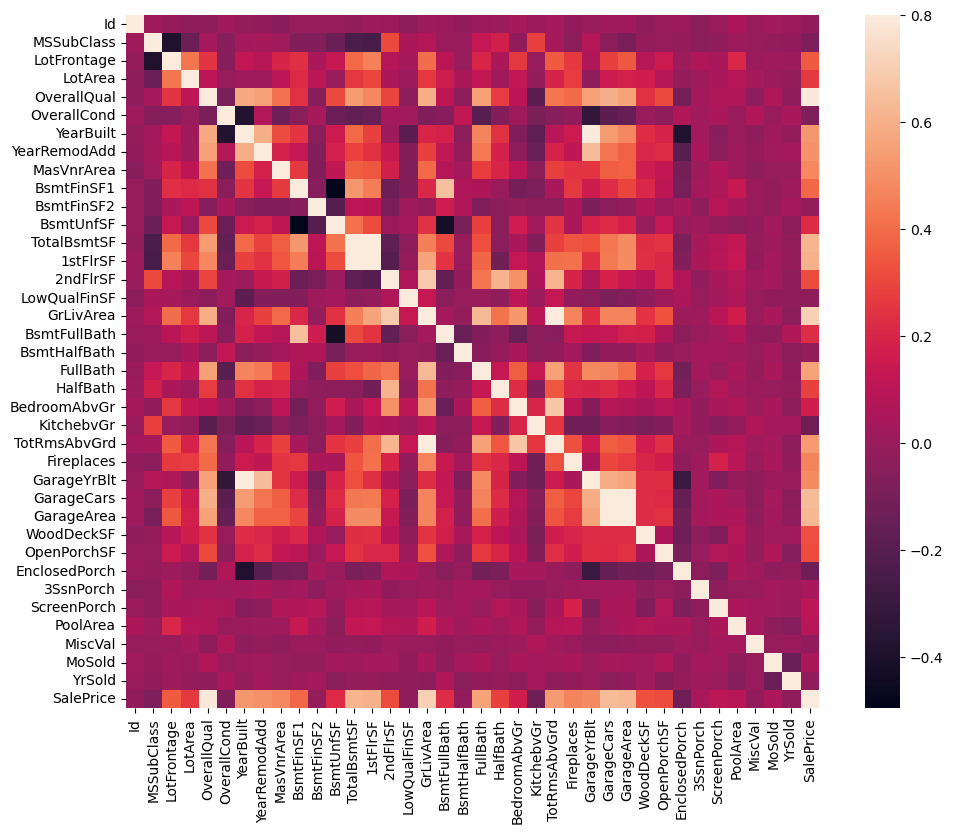

In [20]:
# Calcular la matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Crear un mapa de calor
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)
plt.show()

### Paso 5: Muestra de gráficas de las variables numéricas y categóricas. 
Puede ser boxplot para las numéricas y de conteo/histograma para las categóricas.

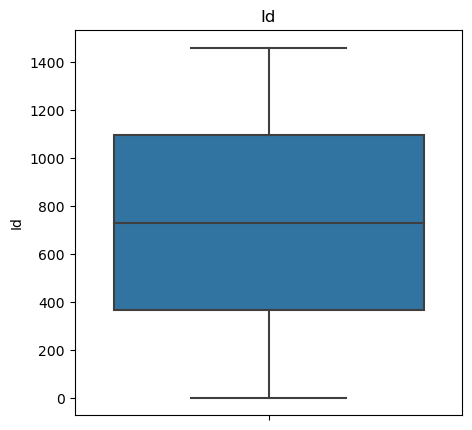

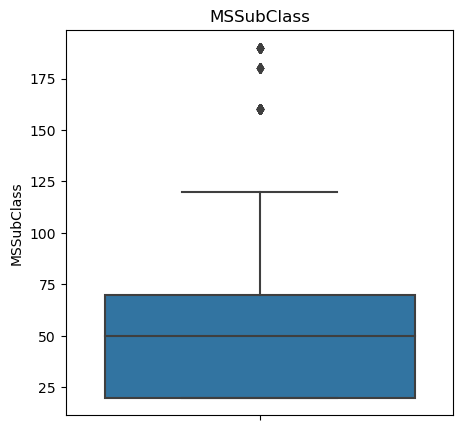

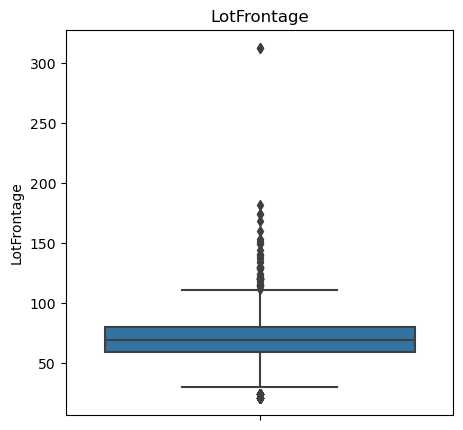

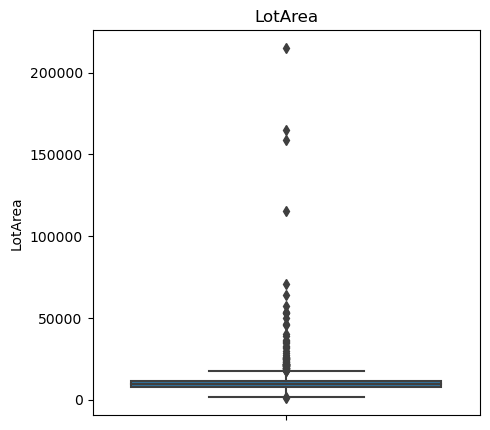

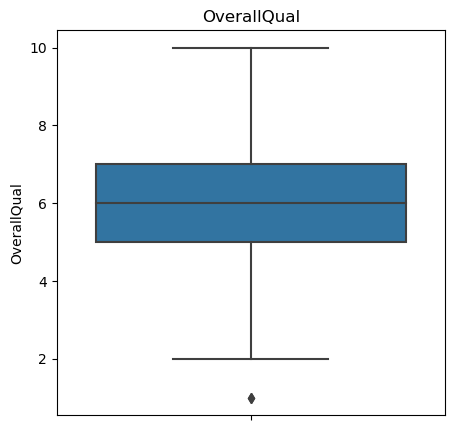

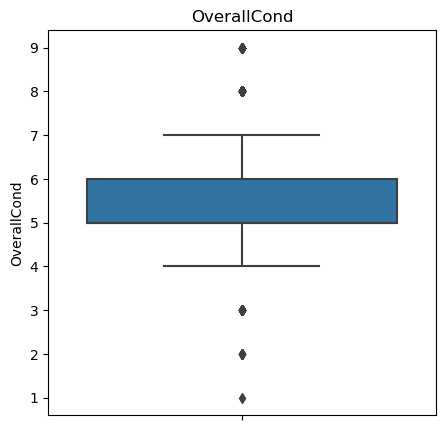

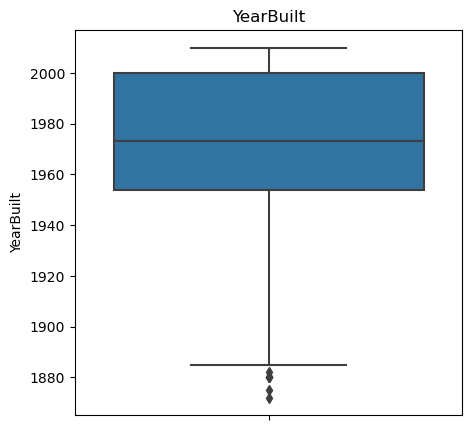

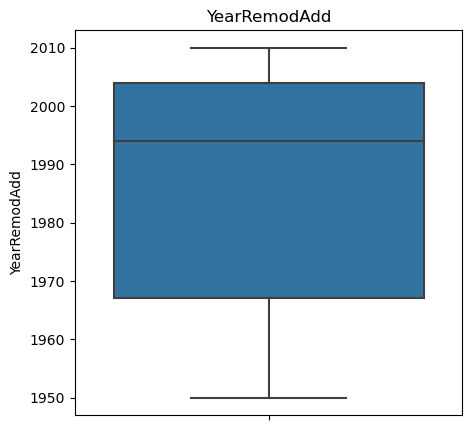

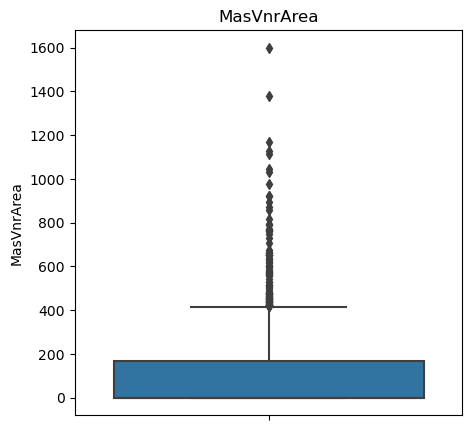

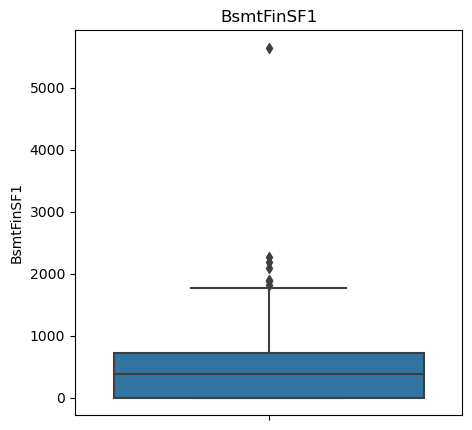

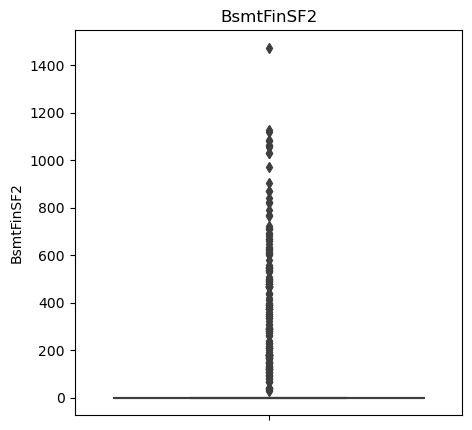

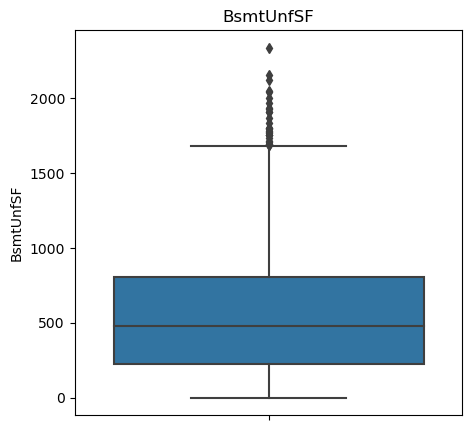

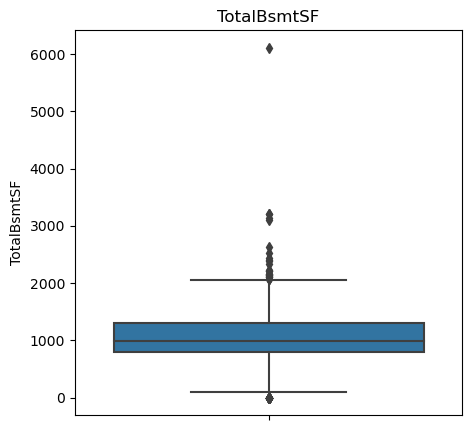

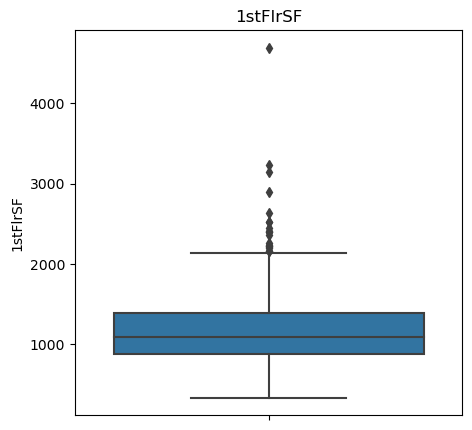

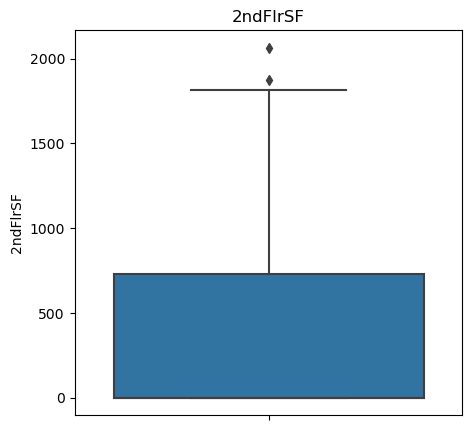

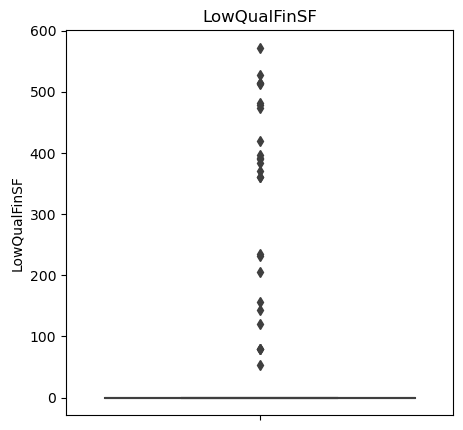

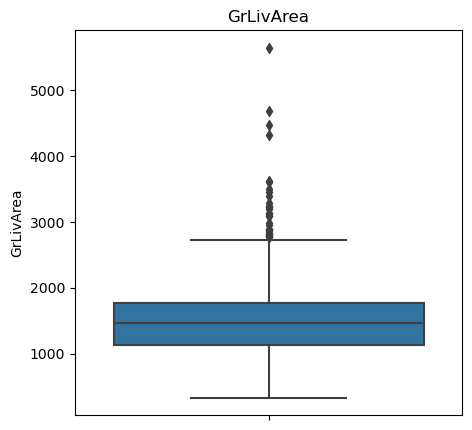

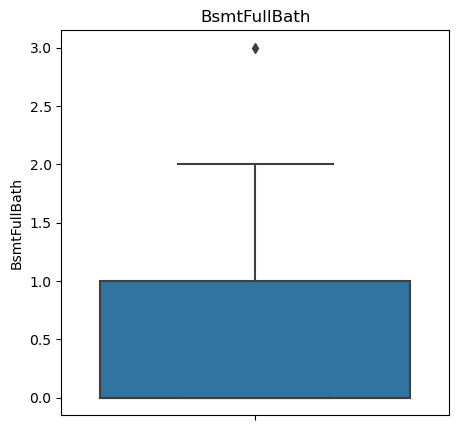

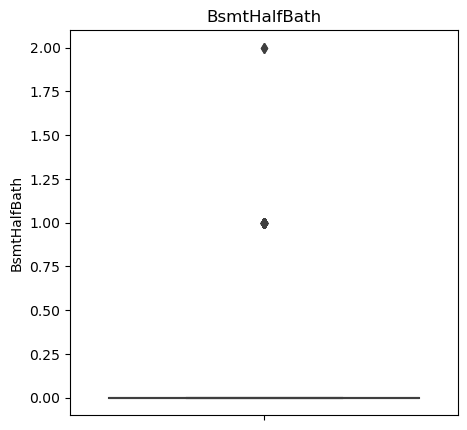

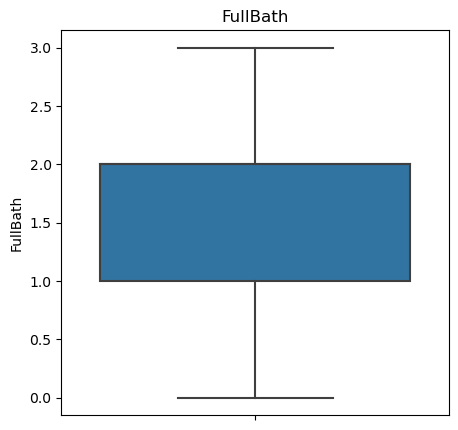

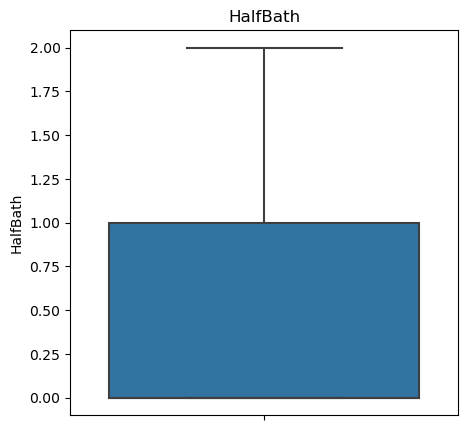

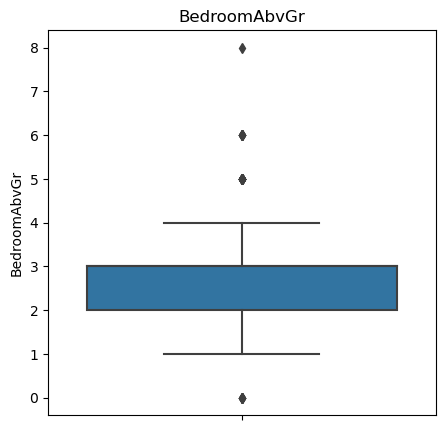

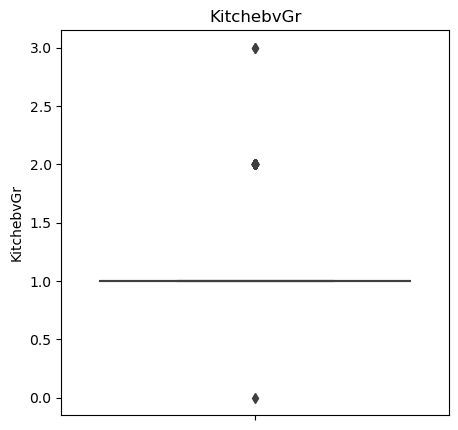

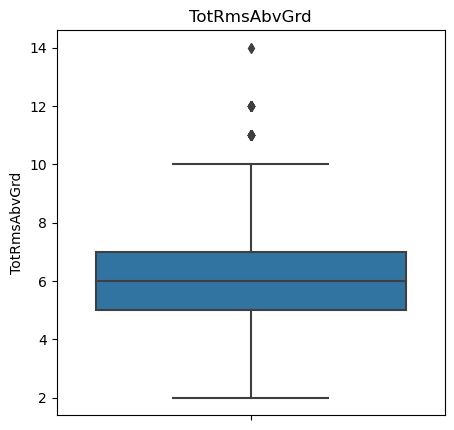

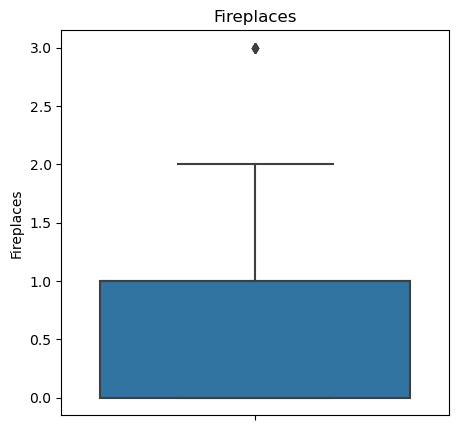

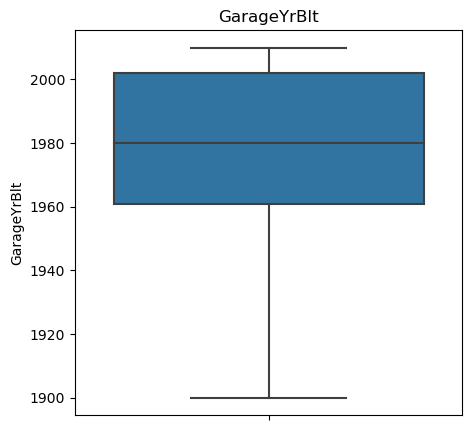

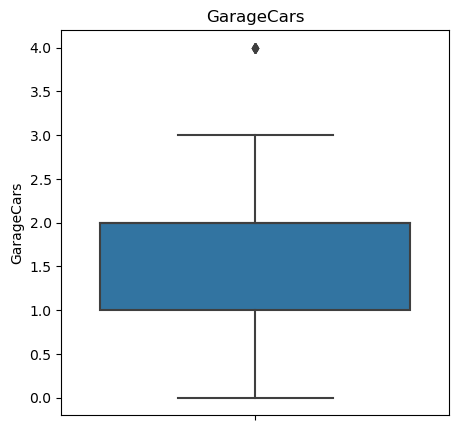

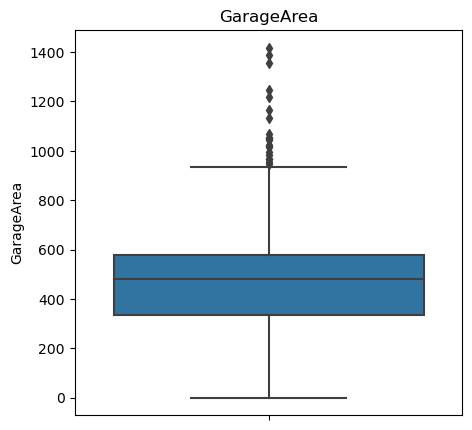

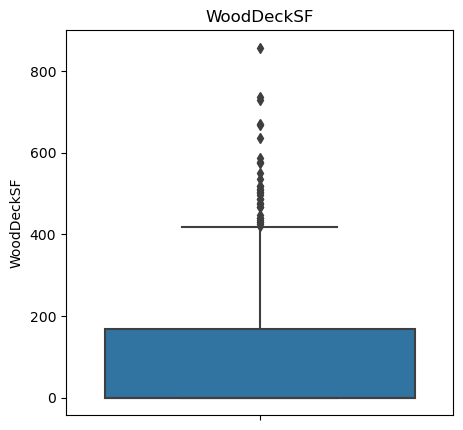

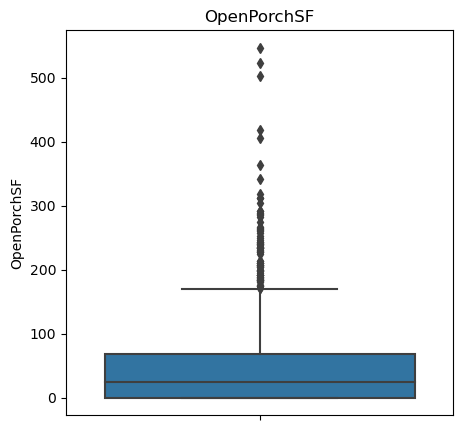

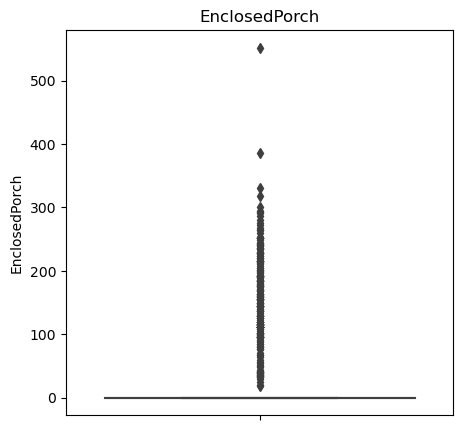

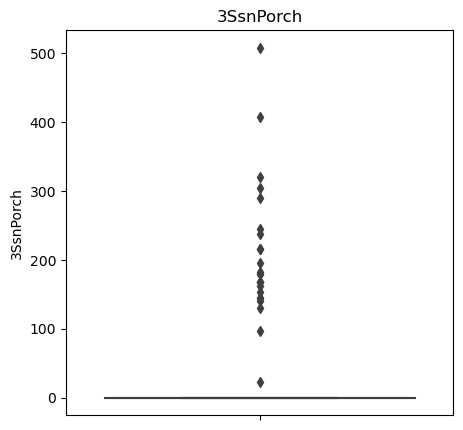

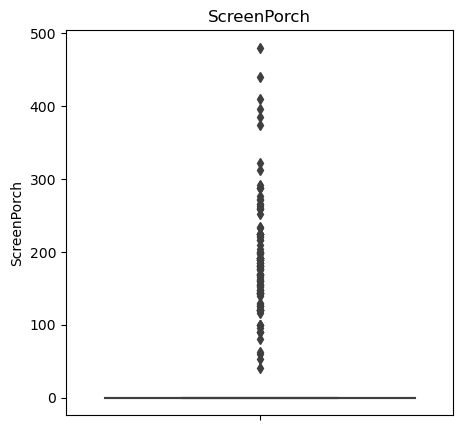

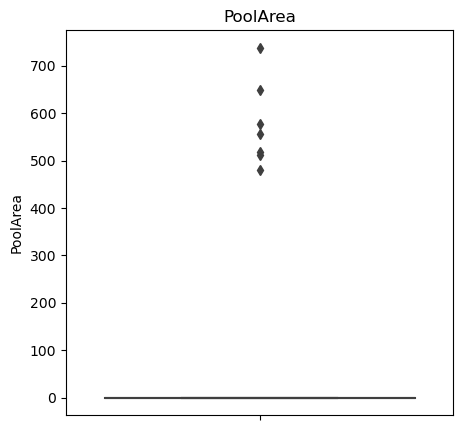

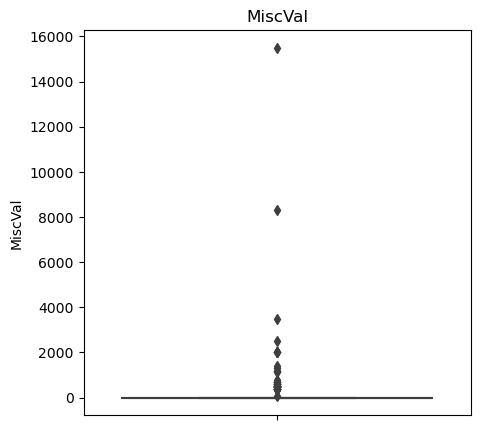

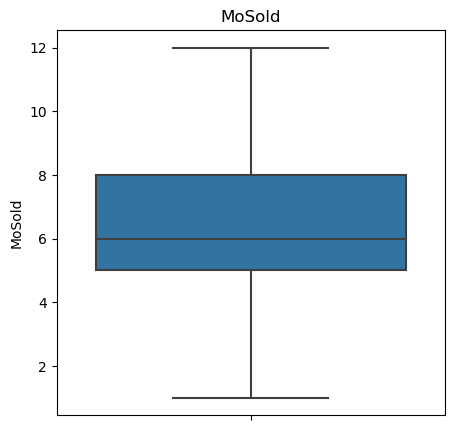

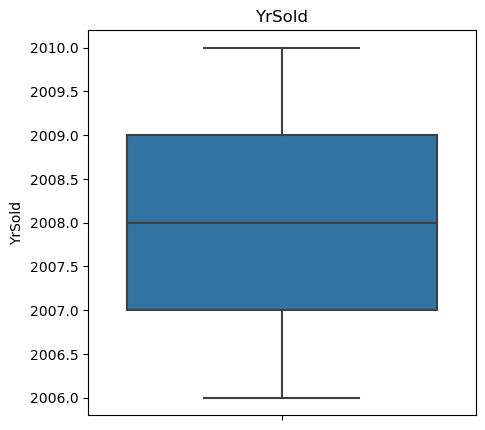

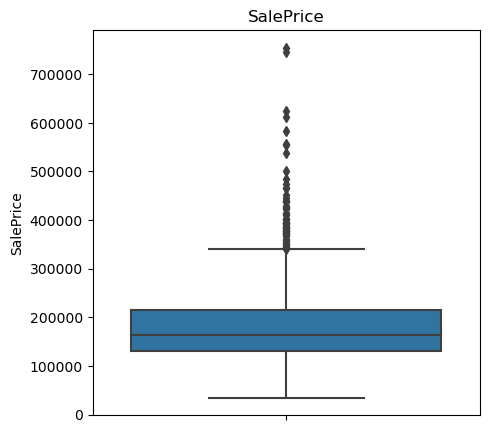

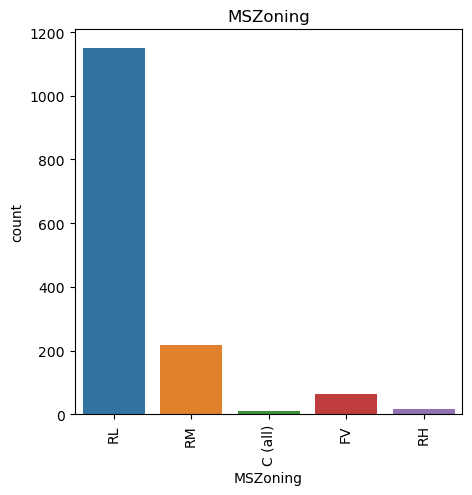

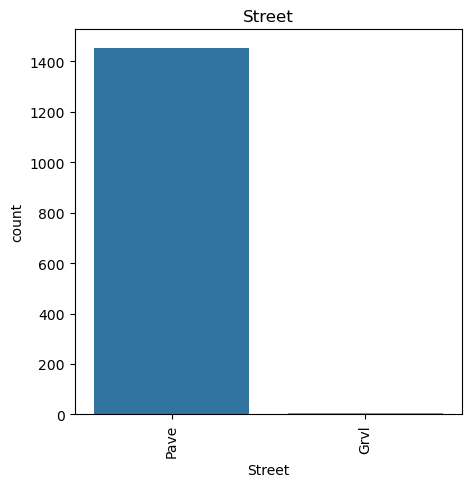

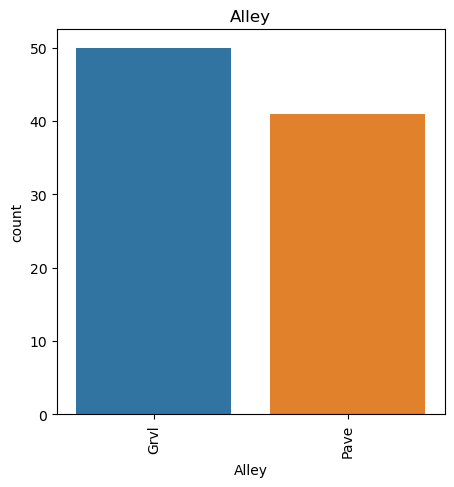

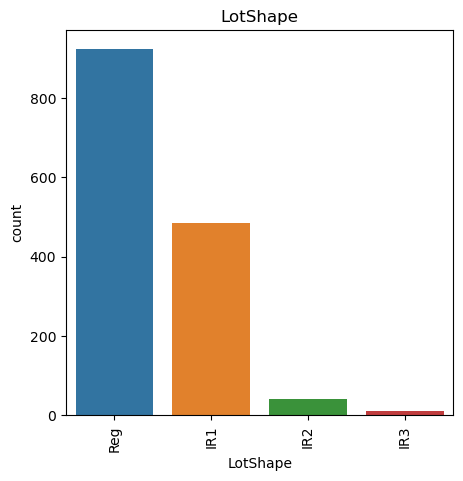

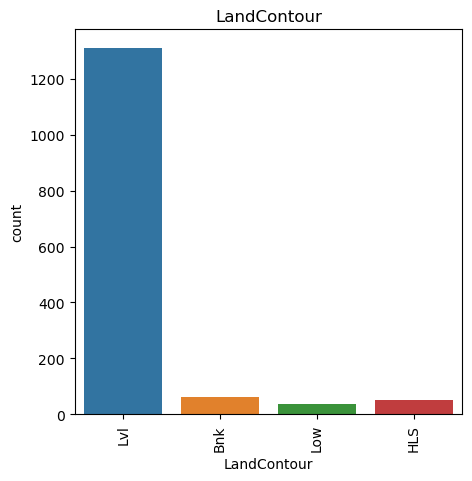

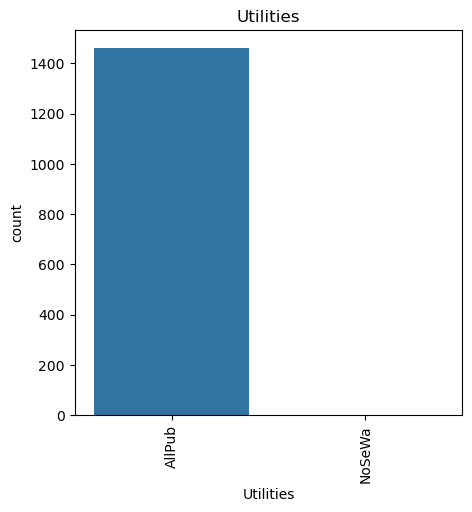

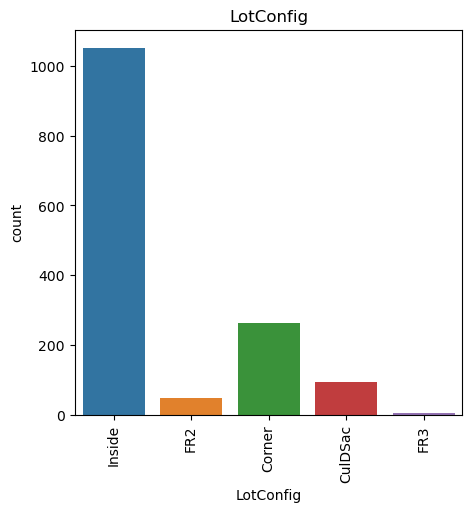

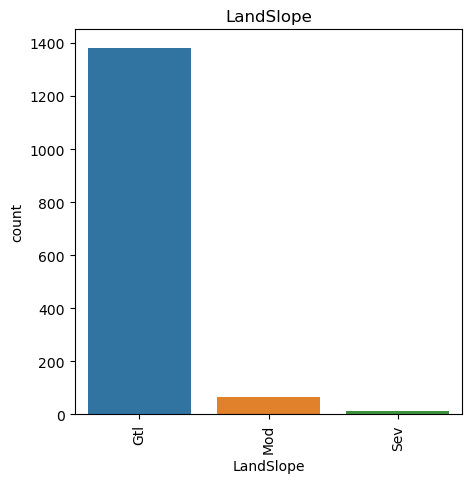

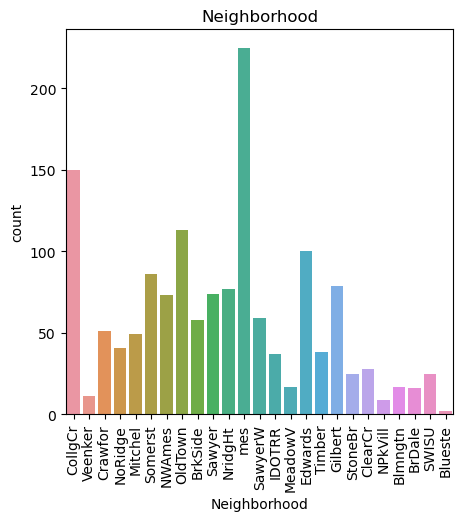

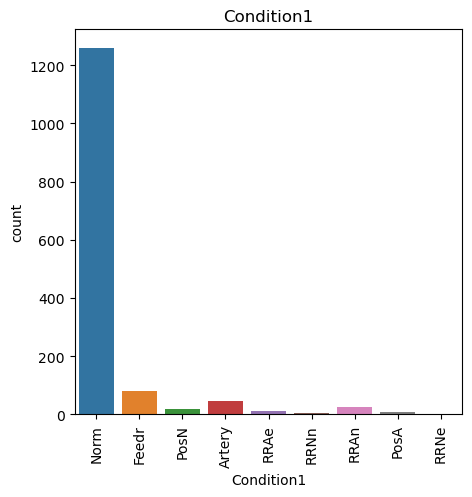

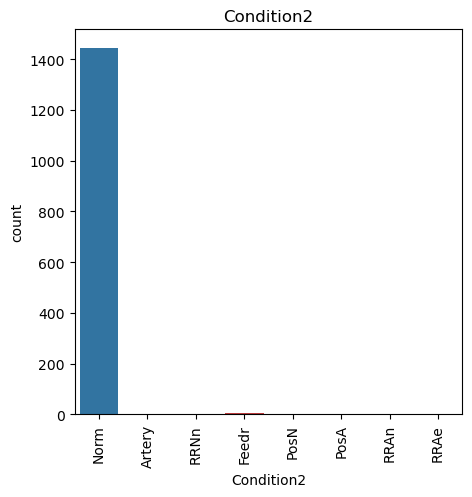

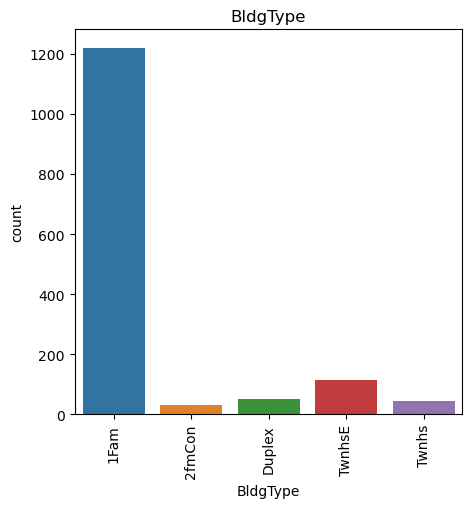

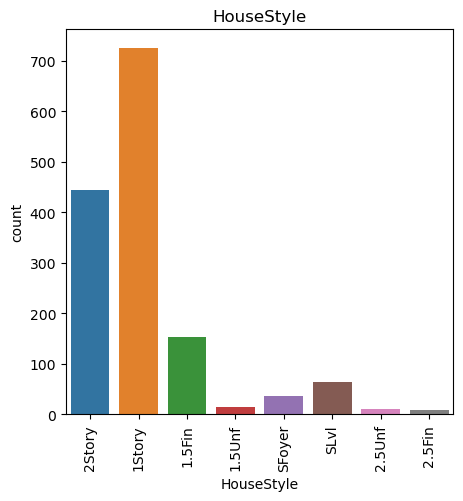

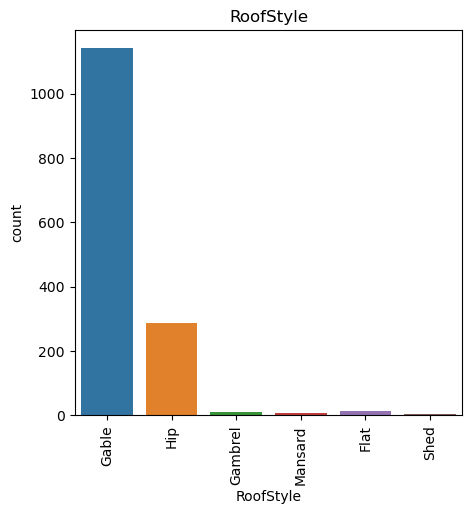

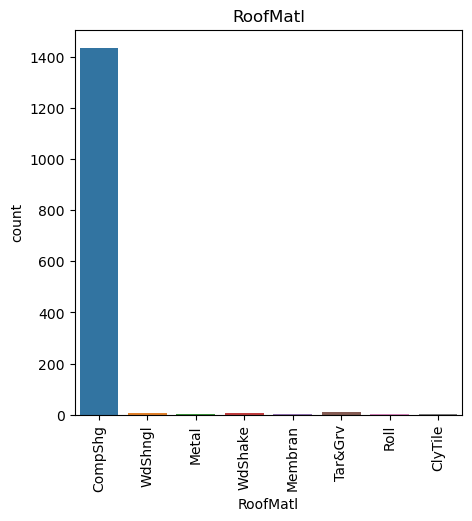

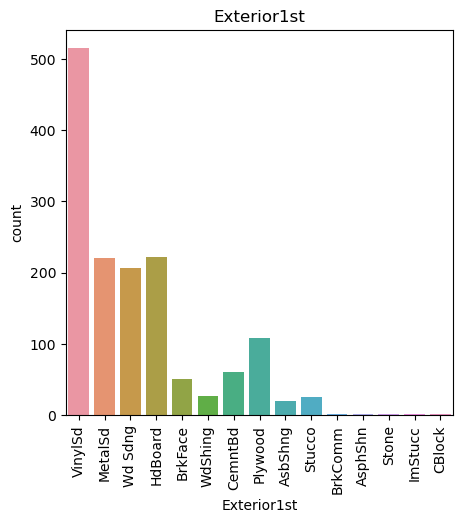

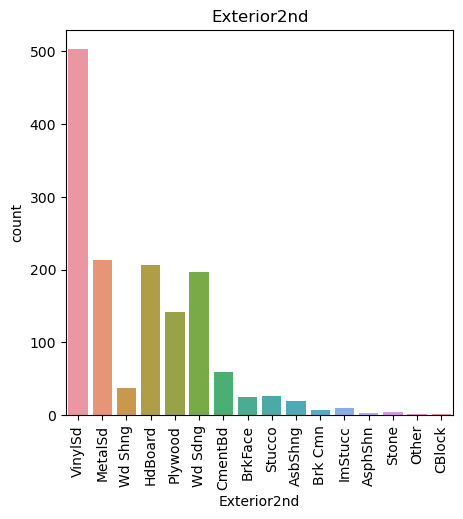

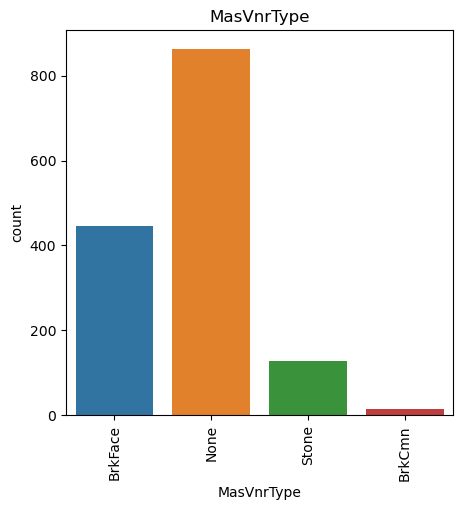

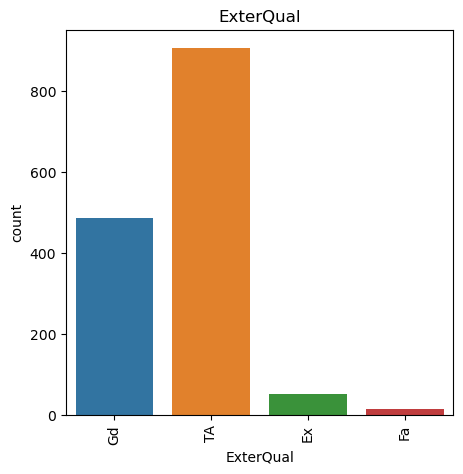

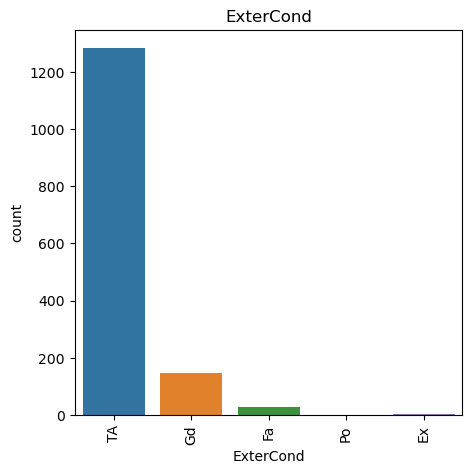

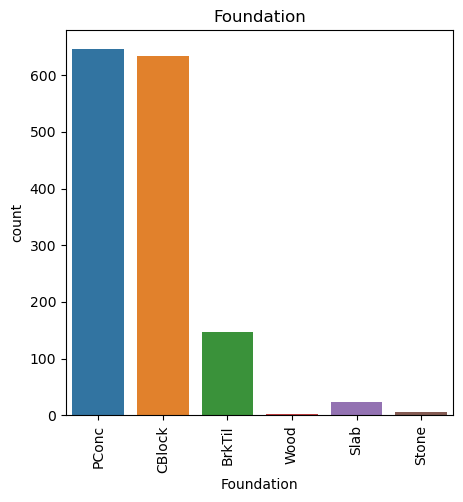

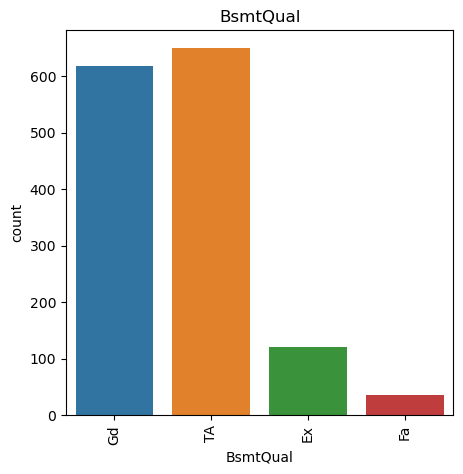

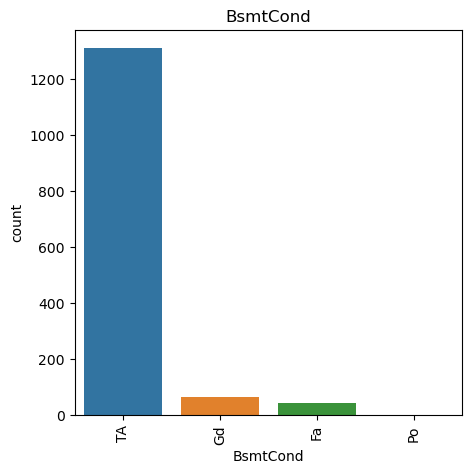

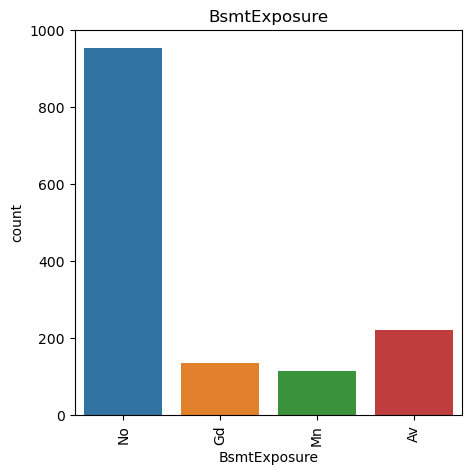

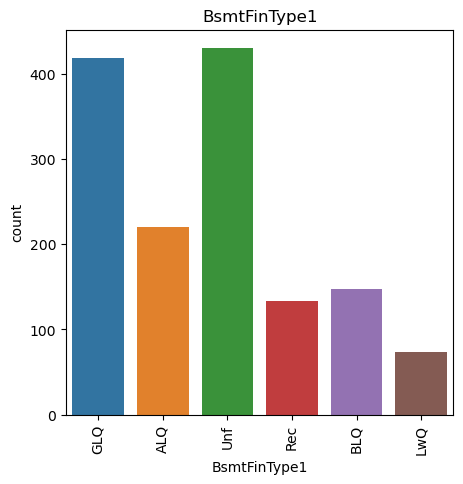

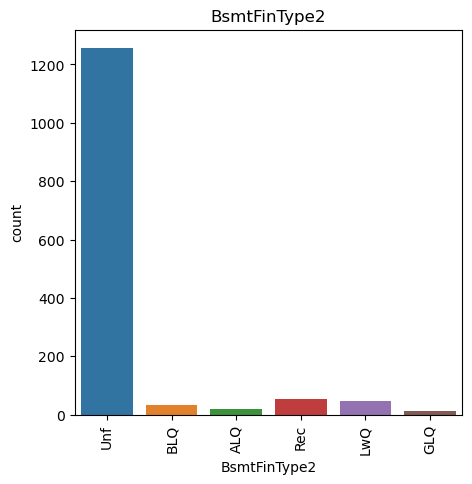

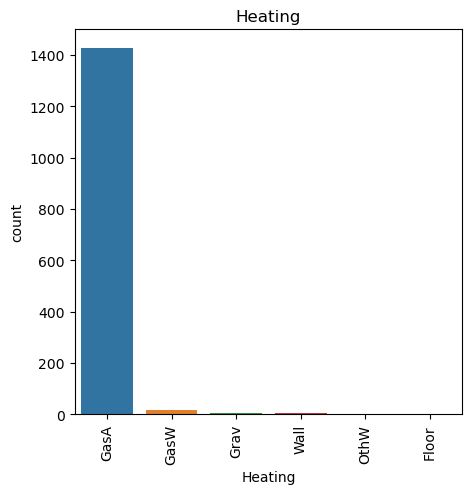

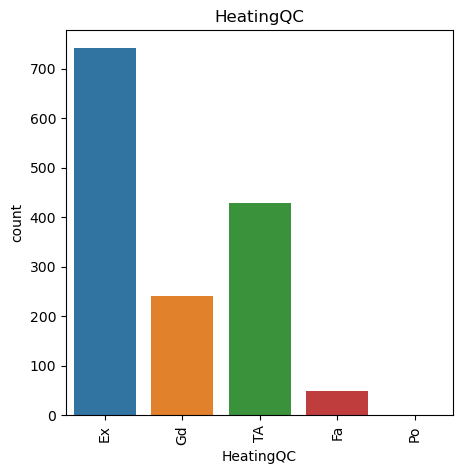

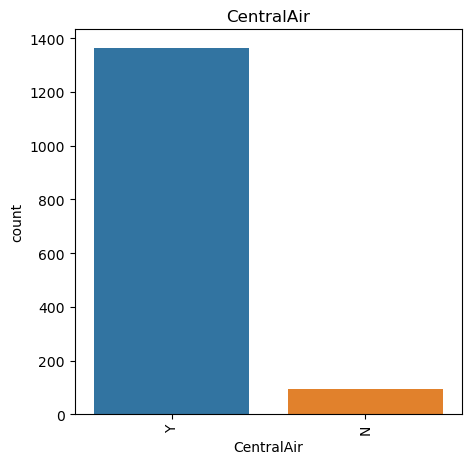

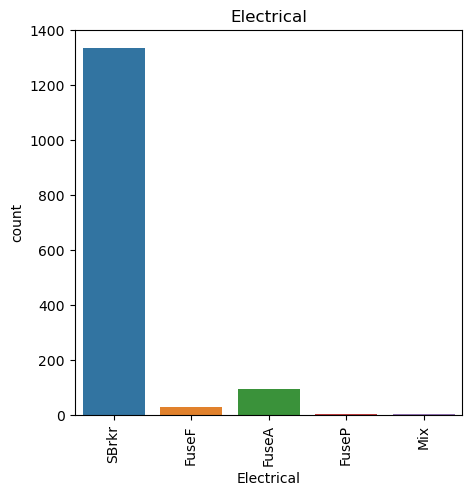

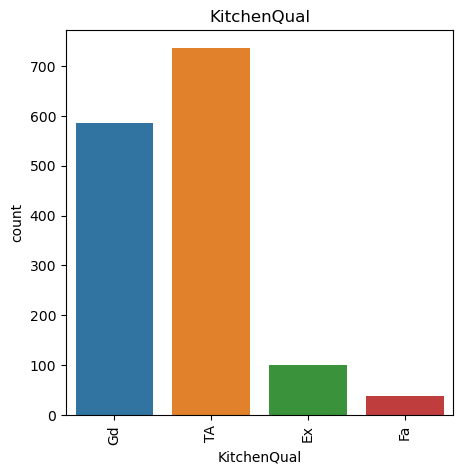

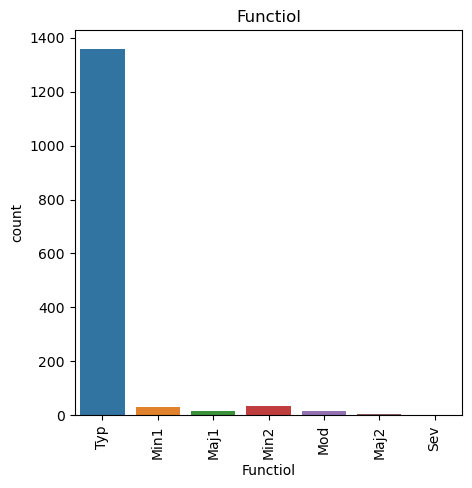

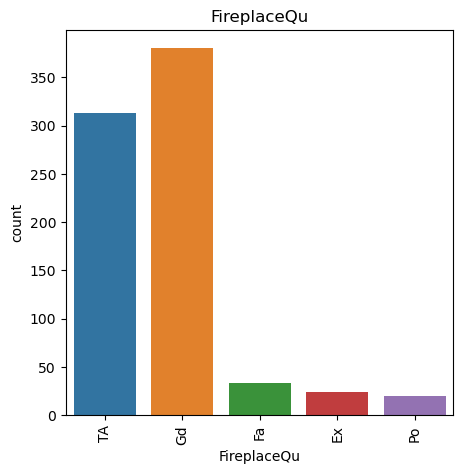

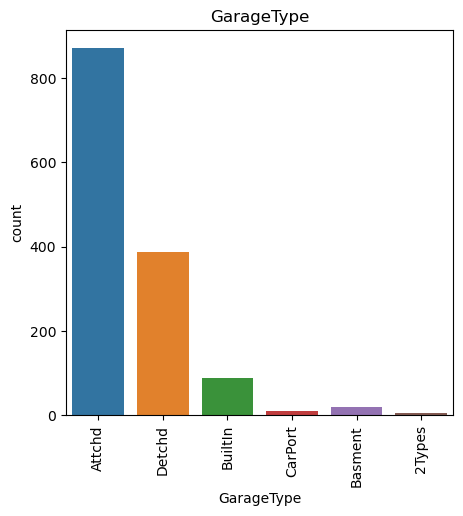

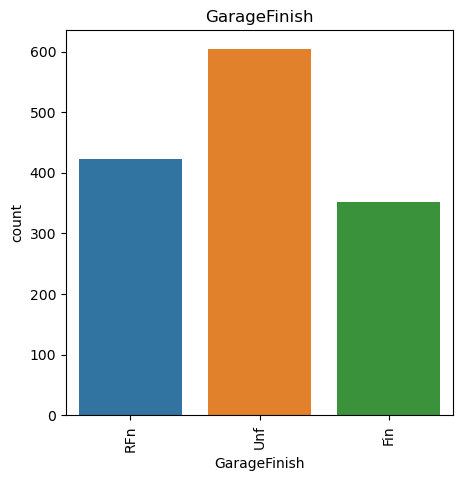

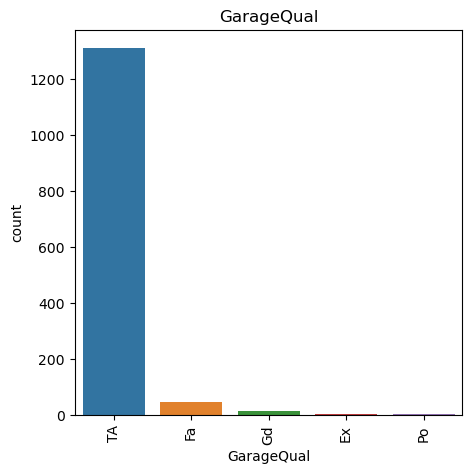

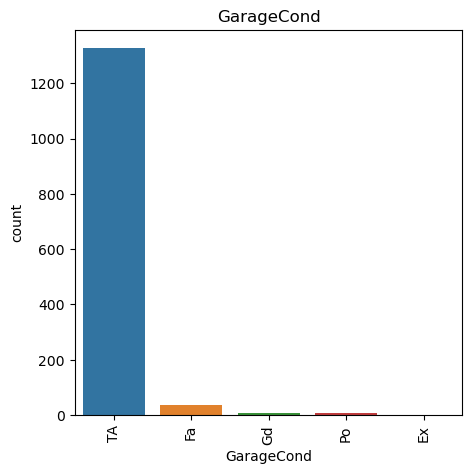

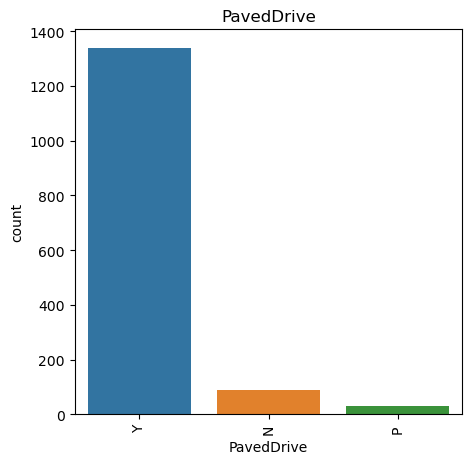

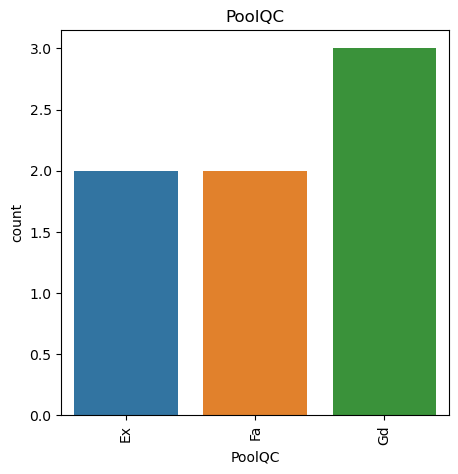

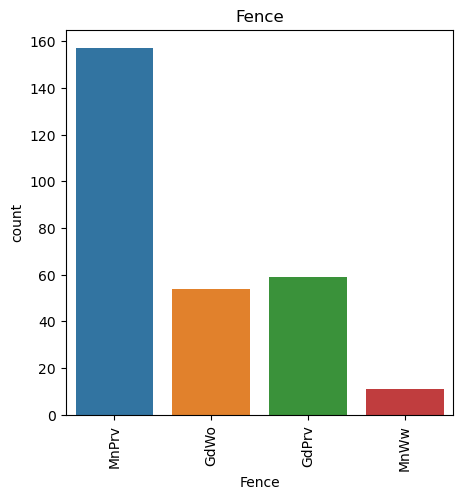

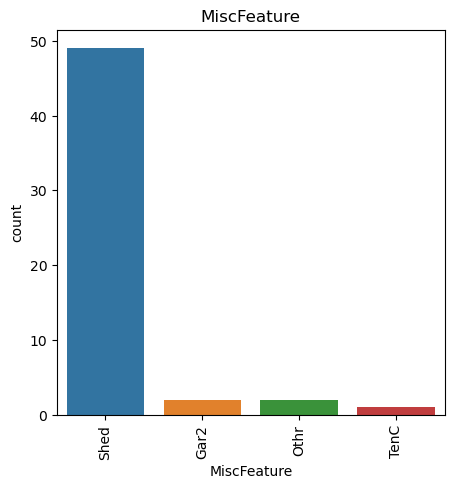

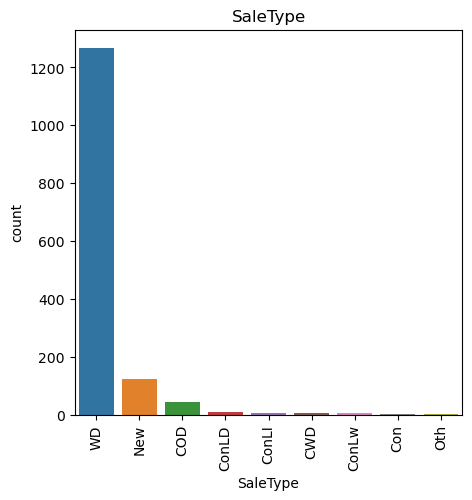

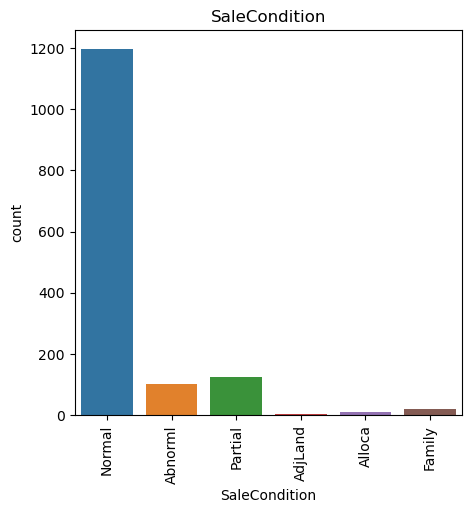

In [11]:
# Seleccionar solo las columnas numéricas
df_num = df.select_dtypes(include=['float64', 'int64'])

# Para cada columna numérica, crear un boxplot
for column in df_num.columns:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df_num[column])
    plt.title(column)
    plt.show()

# Seleccionar solo las columnas de tipo 'object'
df_obj = df.select_dtypes(include=['object'])

# Para cada columna de tipo 'object', crear un gráfico de barras con la cantidad de cada valor único
for column in df_obj.columns:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=df_obj[column])
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()

## Tratamiento de los datos.

### Paso 1: Crear un límite para eliminar los datos nulos, mostrar las variables que harán eliminación a sus nulos y mostrar los conteos antes, eliminar los datos nulos y mostrar los conteos de nuevo.

In [25]:

# Establecer un límite para el porcentaje de datos nulos
limite = 0.25

# Calcular el porcentaje de datos nulos en cada columna
porcentaje_nulos = df.isnull().mean()

# Mostrar las columnas que superan el límite
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > limite].index
print("Columnas a eliminar:", columnas_a_eliminar)

# Mostrar los conteos antes de la eliminación
print("\nConteos antes de la eliminación:")
print(df.count())

# Eliminar las columnas que superan el límite
df = df.drop(columnas_a_eliminar, axis=1)

# Mostrar los conteos después de la eliminación
print("\nConteos después de la eliminación:")
print(df.count())


Columnas a eliminar: Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

Conteos antes de la eliminación:
Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heati

### Paso 2: Si existen nulos aún, dependiendo de la gráficas anteriores, determinar si hay que imputar por medio de la moda, la mediana o la media; realizar la imputación.

In [22]:
# Calcular la cantidad de valores nulos en cada columna
nulos = df.isnull().sum()

# Mostrar solo las columnas que tienen al menos un valor nulo
print(nulos[nulos > 0])


LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


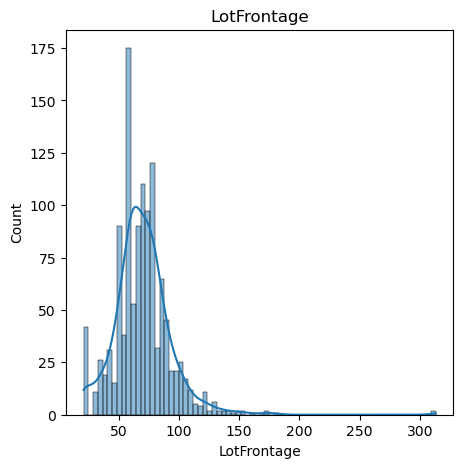

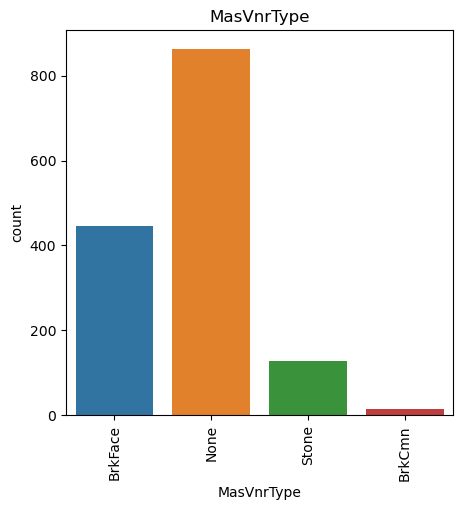

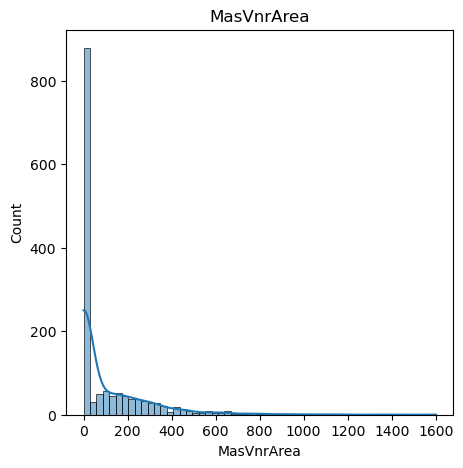

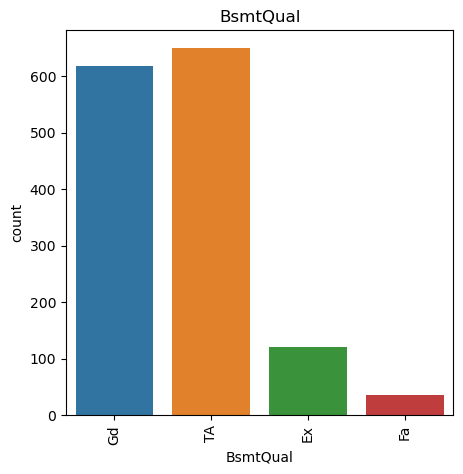

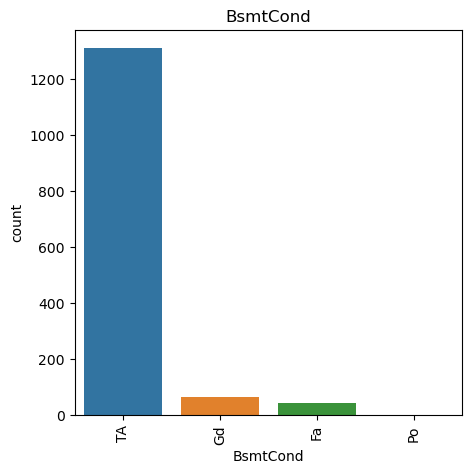

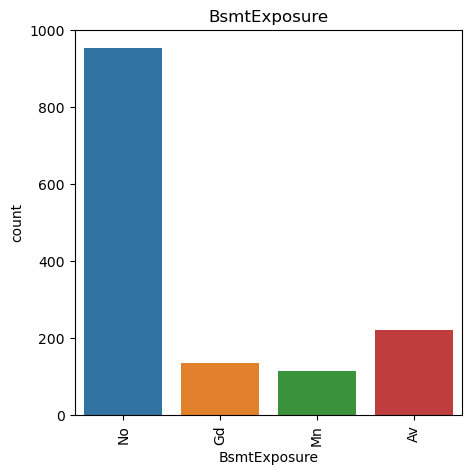

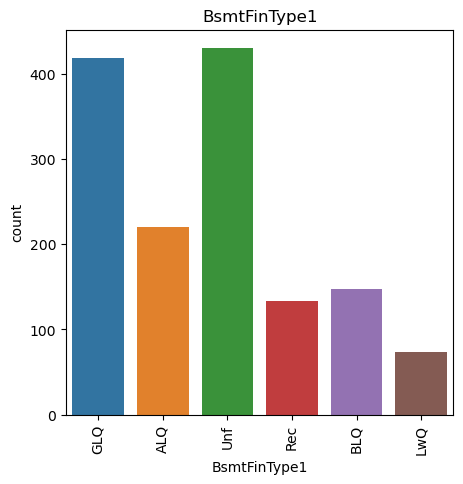

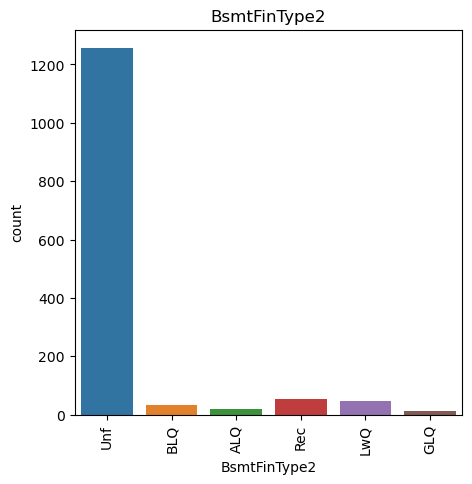

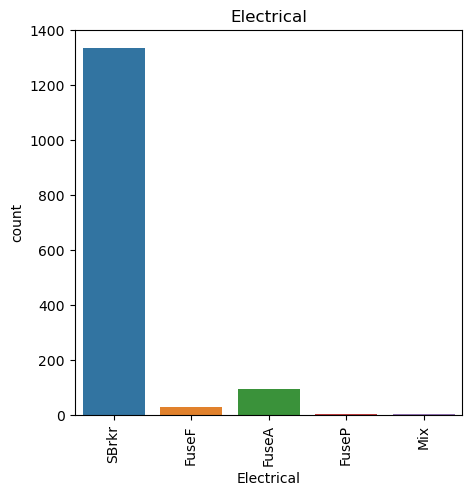

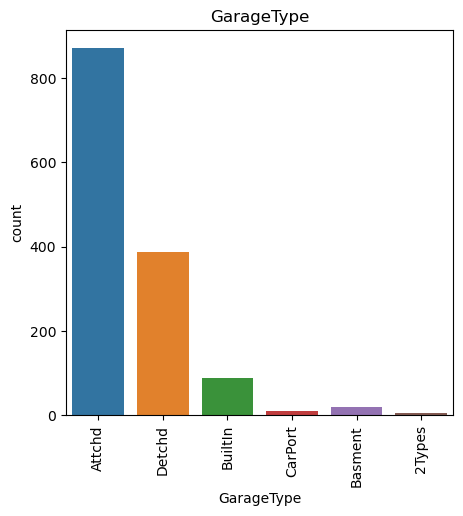

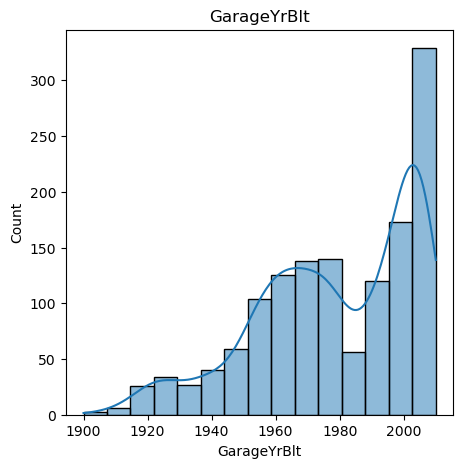

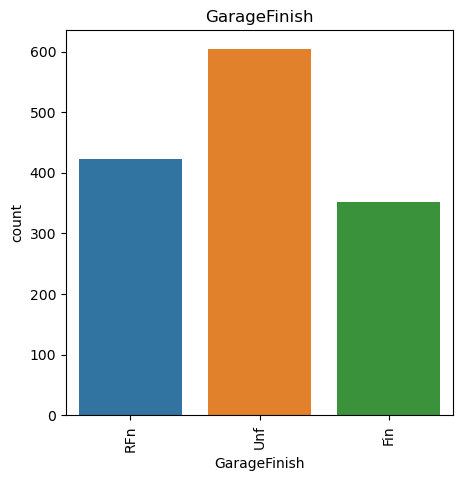

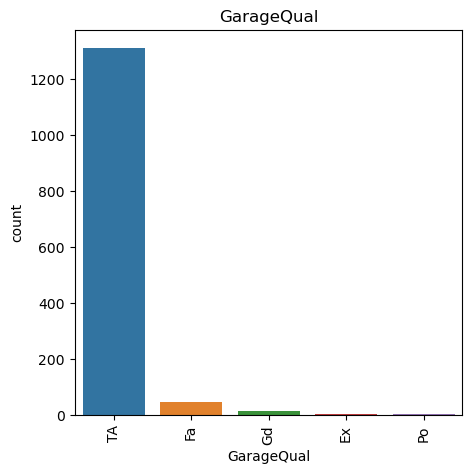

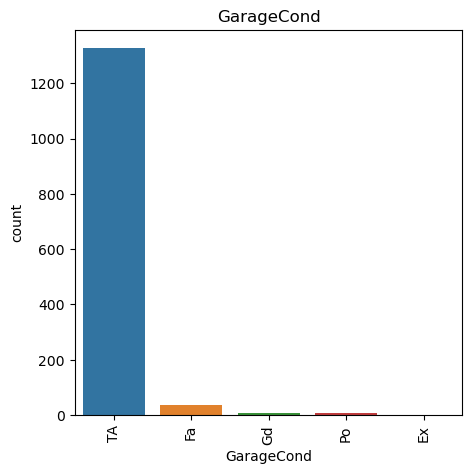

In [23]:
columnas_con_nulos = ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 
                      'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 
                      'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

for columna in columnas_con_nulos:
    # Si la columna es numérica, crea un histograma
    if df[columna].dtype in ['int64', 'float64']:
        plt.figure(figsize=(5, 5))
        sns.histplot(data=df, x=columna, kde=True)
        plt.title(columna)
        plt.show()
    # Si la columna es categórica, crea un gráfico de barras
    else:
        plt.figure(figsize=(5, 5))
        sns.countplot(data=df, x=columna)
        plt.title(columna)
        plt.xticks(rotation=90)
        plt.show()

In [ ]:

# Crear los imputadores
imputer_mediana = SimpleImputer(strategy='median')
imputer_moda = SimpleImputer(strategy='most_frequent')
imputer_media = SimpleImputer(strategy='mean')

# Imputar las columnas con la mediana
columnas_mediana = ['LotFrontage', 'MasVnrArea']
df[columnas_mediana] = imputer_mediana.fit_transform(df[columnas_mediana])

# Imputar las columnas con la moda
columnas_moda = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 
                 'GarageQual', 'GarageCond']
df[columnas_moda] = imputer_moda.fit_transform(df[columnas_moda])

# Imputar las columnas con la media
columnas_media = ['GarageYrBlt']
df[columnas_media] = imputer_media.fit_transform(df[columnas_media])


### Paso 3: Analizar los datos numéricos, determinar si hay anomalías y utilizar el rango intercuartílico para tratarlos, mostrar gráficos antes y después del tratamiento, debe verse si la distribución se vio afectada.

### Paso 4: En base a la exploración previa (paso 3 del análisis y exploración), determinar si alguna columna puede ser categorizada y realizar la categorización.

### Paso 5: De las columnas categorizadas, buscar si hay inconsistencias, en caso de que las haya, hay que mostrarlas y tratarlas.

## Manipulación y preparación de los datos.

### Paso 1: Mostrar la matriz de correlación de nuevo, identificar las columnas que más esté correlacionadas con "SalePrice", mostrar numéricamente las 10 variables que estén correlacionadas más fuertemente a la variable objetivo.

### Paso 2: Responder las preguntas.
1. ¿Con las variables numéricas que se tienen es suficiente para predecir la variable objetivo?
2. ¿Alguna de las variables categóricas servirá realmente para determinar la variable objetivo?


### Paso 3: Conversión de categórico a numérico. Hay que seleccionar las columnas que ya fueron categorizadas y hay que sacar su valor con un "one-hot encoder", luego hay que agregarlas al dataset y eliminar su columna categórica. Hay que mostrar de nuevo las correlaciones para ver si cambiaron las variables más correlacionadas con la variable objetivo.

### Paso 4: Conversión de las demás columnas objeto a numérico. Para ello se va a requerir un encoder más avanzado, usar la clase "MultiColumnLabelEncoder" vista en clase, el dataframe resultante va a ser la versión consolidada y completamente numérica.

### Paso 5: Mostrar la información del nuevo dataframe (numérico), mostrar que no contenga nulos, que todos los datos sean de tipo int/float/uint. Mostrar de nuevo las correlaciones, filtrar para que solo muestre las 10 más correlacionadas a la variable objetivo.

## Presentación del proyecto

### Paso 1: Crear un repositorio en GitHub.
### Paso 2: Subir el trabajo a ese repositorio y crear un archivo README.
### Paso 3: En el README, describir el trabajo, así como describir qué resulta de este proyecto.
### Paso 4: Volver público el repositorio, validar acceso desde fuera y guardar el enlace.
### Paso 5: Enviar el enlace y los demás archivos al profesor para su evaluación (a través de Teams).

## Conclusiones acerca del análisis exploratorio y del dataset en general.